In [1]:
import math
import numpy as np

In [2]:
walls = np.array([
    [[0,0],[10,0]],
    [[10,0],[10,5]],
    [[10,5],[0,5]],
    [[0,5],[0,0]],
])

walls_offset = np.array([
    [[0,0],[10,0]],
    [[10.5,0],[10,5]],
    [[10,5],[0,5.81]],
    [[0.7,5],[0,0.1]],
])

walls_non_convex = np.array([
    [[0,0],[10,0]],
    [[10,0],[10,10]],
    [[10,10],[0,10]],
    [[0,10],[0,0]],
    [[7.5,2.5], [2.5,2.5]],
    [[7.5,7.5], [7.5,2.5]],
    [[2.5,7.5], [7.5,7.5]],
    [[2.5,2.5],[2.5,7.5],],
])

walls_non_convex_offset = np.array([
    [[0,0],[10,0]],
    [[10,0.05],[10,10]],
    [[10,10],[0,10]],
    [[0,10],[0,0]],
    [[7.5,2.5], [2.5,2.55]],
    [[8.505,7.5], [7.5,2.5]],
    [[2.5,7.5], [7.55,7.5]],
    [[2.5,2.505],[3.55,7.5],],
])


In [3]:
def shift(wall:np.array, d):
    """This will shift the wall by d units assuming the wall is always on the right
    
    >>> shift([[0, 0],[10, 0]], 1)
    >>> [[0, 1],[10, 1]]
    """
    
    dx, dy = wall[1, 0]-wall[0, 0], wall[1, 1]-wall[0,1]
    distance = math.sqrt(dy**2 + dx **2)
    translation_vec = np.array([-dy, dx]) / distance * d

    shifted_wall = []
    for coord in wall:
        newcoord = np.array(coord) + translation_vec
        shifted_wall.append(list(newcoord))

    return np.array(shifted_wall)


print(shift(walls[0], 1))

[[ 0.  1.]
 [10.  1.]]


In [4]:
def shiftall(walls:np.array, d):
    walls_shifted = []
    for wall in walls:
        walls_shifted.append(shift(wall, d))
    
    return np.array(walls_shifted)

print(shiftall(walls, 1))

[[[ 0.  1.]
  [10.  1.]]

 [[ 9.  0.]
  [ 9.  5.]]

 [[10.  4.]
  [ 0.  4.]]

 [[ 1.  5.]
  [ 1.  0.]]]


In [5]:
def cornermatch(walls:np.array):
    """This function will return a dictionary that maps indices to other indices based off of which other wall has the closest starting point to the first walls endpoint"""
    graph = {}
    for i in range(len(walls)):
        minindex = 0
        for j in range(len(walls)):
            if i == j:
                continue

            distance = math.sqrt((walls[i, 1, 1]-walls[j, 0, 1])**2 + (walls[i, 1, 0]-walls[j, 0, 0])**2)
            minindex = j if math.sqrt((walls[i, 1, 1]-walls[minindex, 0, 1])**2 + (walls[i, 1, 0]-walls[minindex, 0, 0])**2) > distance else minindex
        graph[i] = minindex
    return graph


print(cornermatch(walls_non_convex))

{0: 1, 1: 2, 2: 3, 3: 0, 4: 7, 5: 4, 6: 5, 7: 6}


In [6]:
def intersect(w1, w2):
    def find_line_equation(point1, point2):
        x1, y1 = point1
        x2, y2 = point2

        # Calculate the slope (m)
        if x2 - x1 != 0:
            slope = (y2 - y1) / (x2 - x1)
        else:
            # The slope is undefined for vertical lines (x2 - x1 = 0)
            slope = 99999

        # Calculate the y-intercept (b)
        y_intercept = y1 - slope * x1

        return slope, y_intercept

    # Get the equations of the two lines
    m1, b1 = find_line_equation(w1[0], w1[1])
    m2, b2 = find_line_equation(w2[0], w2[1])

    # Check if the lines are parallel (no intersection)
    if m1 == m2:
        return None

    # Calculate the x-coordinate of the intersection point
    x_intersection = (b2 - b1) / (m1 - m2)

    # Calculate the y-coordinate using one of the line equations
    y_intersection = m1 * x_intersection + b1

    return round(x_intersection, 2), round(y_intersection, 2)

print(intersect(walls[1], walls[2]))

(10.0, 5.0)


In [7]:
def cornermerge(walls_shifted:np.array, wall_graph:dict):
    bloated_walls = walls_shifted.copy()
    for k in wall_graph.keys():
        ipoint = intersect(walls_shifted[k], walls_shifted[wall_graph[k]])
        bloated_walls[k, 1]= ipoint
        bloated_walls[wall_graph[k], 0] = ipoint
    
    return bloated_walls
    

In [8]:
def cornerRepair(walls:np.array, walls_shifted:np.array):
    wall_graph = cornermatch(walls)
    walls_bloat = cornermerge(walls_shifted, wall_graph)
    return walls_bloat



In [9]:
def bloat(walls:np.array, d):
    walls_shifted = shiftall(walls, d)
    return cornerRepair(walls, walls_shifted)

print(bloat(walls, 1))

[[[1. 1.]
  [9. 1.]]

 [[9. 1.]
  [9. 4.]]

 [[9. 4.]
  [1. 4.]]

 [[1. 4.]
  [1. 1.]]]


# plotting functions

In [10]:
import matplotlib.pyplot as plt

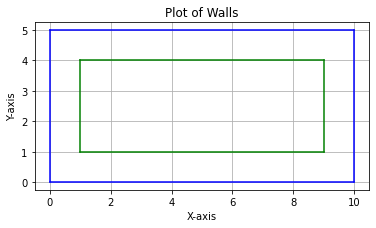

In [11]:
def plot_walls(walls, bloated):
    for wall in walls:
        x_values = [point[0] for point in wall]
        y_values = [point[1] for point in wall]
        plt.plot(x_values, y_values, color="blue")

    for wall in bloated:
        x_values = [point[0] for point in wall]
        y_values = [point[1] for point in wall]
        plt.plot(x_values, y_values, color="green")

    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Plot of Walls')
    plt.grid(True)
    plt.gca().set_aspect('equal')
    plt.show()

plot_walls(walls, bloat(walls, 1))

# Testing

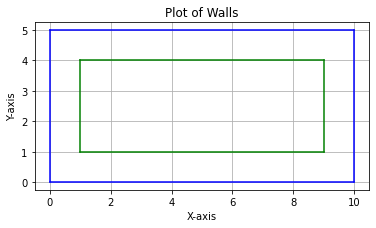

In [12]:
plot_walls(walls, bloat(walls, 1))

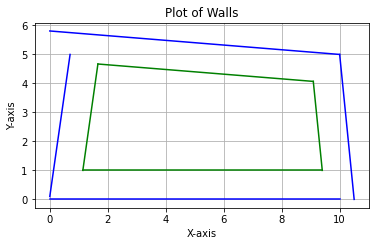

In [13]:
plot_walls(walls_offset, bloat(walls_offset, 1))

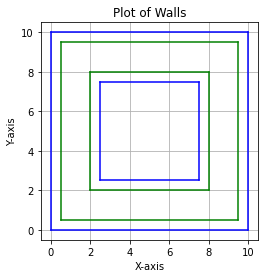

In [14]:
plot_walls(walls_non_convex, bloat(walls_non_convex, .5))

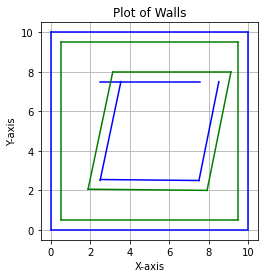

In [15]:
plot_walls(walls_non_convex_offset, bloat(walls_non_convex_offset, .5))

# Reading from file

In [18]:
def walls_from_file(filename):
    walls = np.loadtxt(filename)
    return walls.reshape(-1, 2, 2)

def walls_to_file(walls, filename):
    with open(filename, 'w') as file:
        for wall in walls:
            x1, y1 = wall[0]
            x2, y2 = wall[1]
            file.write(f"{x1} {y1} {x2} {y2}\n")

walls_to_file(walls_non_convex, "walls.txt")
print(walls_from_file("walls.txt"))

[[[ 0.   0. ]
  [10.   0. ]]

 [[10.   0. ]
  [10.  10. ]]

 [[10.  10. ]
  [ 0.  10. ]]

 [[ 0.  10. ]
  [ 0.   0. ]]

 [[ 7.5  2.5]
  [ 2.5  2.5]]

 [[ 7.5  7.5]
  [ 7.5  2.5]]

 [[ 2.5  7.5]
  [ 7.5  7.5]]

 [[ 2.5  2.5]
  [ 2.5  7.5]]]
